# Midterm part1 
**พลวัต เจนศิริพาณิชย์ 6130348121**

> 


In [ ]:
!gdown
import gdown
gdown.download('https://drive.google.com/uc?id=18c4GmCkirsHQ7hEDY0czPCRa2hh8nMAg', '/content/week7.tar.gz', quiet=False)


Mounted at /content/gdrive


In [ ]:
!tar xvzf /content/gdrive/MyDrive/AIFORTHAI-LST20Corpus.tar.gz

Streaming output truncated to the last 5000 lines.
LST20_Corpus/train/._T12371.txt
LST20_Corpus/train/T12371.txt
LST20_Corpus/train/._T11678.txt
LST20_Corpus/train/T11678.txt
LST20_Corpus/train/._T10566.txt
LST20_Corpus/train/T10566.txt
LST20_Corpus/train/._T00775.txt
LST20_Corpus/train/T00775.txt
LST20_Corpus/train/._T12417.txt
LST20_Corpus/train/T12417.txt
LST20_Corpus/train/._T12403.txt
LST20_Corpus/train/T12403.txt
LST20_Corpus/train/._T10214.txt
LST20_Corpus/train/T10214.txt
LST20_Corpus/train/._T01319.txt
LST20_Corpus/train/T01319.txt
LST20_Corpus/train/._T00761.txt
LST20_Corpus/train/T00761.txt
LST20_Corpus/train/._T01457.txt
LST20_Corpus/train/T01457.txt
LST20_Corpus/train/._T00991.txt
LST20_Corpus/train/T00991.txt
LST20_Corpus/train/._T11644.txt
LST20_Corpus/train/T11644.txt
LST20_Corpus/train/._T00749.txt
LST20_Corpus/train/T00749.txt
LST20_Corpus/train/._T13053.txt
LST20_Corpus/train/T13053.txt
LST20_Corpus/train/._T11122.txt
LST20_Corpus/train/T11122.txt
LST20_Corpus/train/

In [ ]:
with open("/content/LST20_Corpus/genres.txt", "r") as genre_file:
    Lines = genre_file.readlines()
genre_file.closed

True

In [ ]:
genre_map = {}
genre_list = ['politics', 'C&A', 'general', 'economics', 'culture', 'STE', 'international', 'environment', 'weather', 'health', 'disaster', 'entertainment', 'development', 'sports', 'royal']
genre_2_num_map = dict(zip(genre_list, range(len(genre_list))))
num_2_genre_map = dict(zip(range(len(genre_list)), genre_list))

display(num_2_genre_map)
display(genre_2_num_map)

for line in Lines:
  tag = line[11:len(line)-1]
  if tag == 'inter':
    tag = 'international'
  elif tag == 'politic':
    tag = 'politics'
  genre_map[line[:10]]=genre_2_num_map[tag]

i=0
for file in genre_map:
  if i > 10:
    break
  print(file,genre_map[file])
  i+=1
print(len(genre_map))

{0: 'politics',
 1: 'C&A',
 2: 'general',
 3: 'economics',
 4: 'culture',
 5: 'STE',
 6: 'international',
 7: 'environment',
 8: 'weather',
 9: 'health',
 10: 'disaster',
 11: 'entertainment',
 12: 'development',
 13: 'sports',
 14: 'royal'}

{'C&A': 1,
 'STE': 5,
 'culture': 4,
 'development': 12,
 'disaster': 10,
 'economics': 3,
 'entertainment': 11,
 'environment': 7,
 'general': 2,
 'health': 9,
 'international': 6,
 'politics': 0,
 'royal': 14,
 'sports': 13,
 'weather': 8}

T00126.txt 0
T00127.txt 1
T00128.txt 1
T00129.txt 2
T00130.txt 1
T00131.txt 1
T00132.txt 1
T00133.txt 1
T00134.txt 1
T00135.txt 1
T00136.txt 0
4751


In [ ]:
train={}
test={}
eval={}
max_len = 0
#sentences={}

def handle_file(ls,fn,status):
  global max_len
  sentence=""
  train_list=[]
  
  is_begin=False
  sum_text=""
  for line in ls:
    line = line.replace("\t",":")
    word = line.split(":")
    if len(word) > 1 and word[1] != "PU":
      #sentence+=
      if word[2][0]=="B" and not is_begin:
        sum_text+=word[0]
        is_begin = True
      elif word[2][0] in ["I","E"] and is_begin:
        sum_text+=word[0]
      elif word[2][0] =="B" and is_begin:
        train_list.append(sum_text)
        sum_text = word[0]
      elif word[2][0] not in ["I","E","B"] and is_begin:
        train_list.append(sum_text)
        sum_text = ""
        train_list.append(word[0])
        is_begin=False
      elif word[2][0] not in ["I","E","B"] and not is_begin:
        train_list.append(word[0])
        
  if max_len < len(train_list):
    max_len = len(train_list)
  if status == 0:
    train[fn]=train_list
  elif status == 1:
    test[fn]=train_list
  else: 
    eval[fn]=train_list
  #sentences[fn]=sentence

In [ ]:
!pip install pythainlp
!pip install marisa_trie
!pip install pythainlp[deepcut,icu]
!pip install sklearn_crfsuite
!pip install tensorflow deepcut
!pip install attacut


     |████████████████████████████████| 10.6MB 5.4MB/s 
     |████████████████████████████████| 747kB 49.2MB/s 
     |████████████████████████████████| 276kB 5.6MB/s 
  Created wheel for marisa-trie: filename=marisa_trie-0.7.5-cp37-cp37m-linux_x86_64.whl size=861706 sha256=50bbde0696362bb77a7e074e03d6c63dd253d26c82ecdf3ed82a796c06c70791
  Stored in directory: /root/.cache/pip/wheels/45/24/79/022624fc914f0e559fe8a1141aaff1f9df810905a13fc75d57
Successfully built marisa-trie
     |████████████████████████████████| 235kB 4.0MB/s 
  Created wheel for pyicu: filename=PyICU-2.6-cp37-cp37m-linux_x86_64.whl size=1306413 sha256=493c482db82b3a1789ab02c9192621983584ea0dec7684bc426fada4ede2dabb
  Stored in directory: /root/.cache/pip/wheels/31/21/2f/1c91831e8a93537ab21f6b4b935781b681104635fdb0315791
Successfully built pyicu
     |████████████████████████████████| 2.0MB 3.9MB/s 
     |████████████████████████████████| 1.3MB 4.1MB/s 
     |████████████████████████████████| 645kB 14.8MB/s 
     |█████

In [ ]:
from pythainlp.corpus.common import thai_words
from pythainlp.tokenize import word_tokenize
from marisa_trie import Trie

thai_dict = set(thai_words())
trie = Trie(thai_dict)

In [ ]:
train_new={}
test_new={}
eval_new={}

train_att={}
test_att={}
eval_att={}

train_ss={}
test_ss={}
eval_ss={}

new_lenght =0
att_lenght =0

new_count=0
att_count=0

def handle_data_pythai(ls,fn,status):
  sentence=""
  for line in ls:
    line = line.replace("\t",":")
    word = line.split(":")
    if len(word) > 1 and word[1] != "PU":
        sentence+=word[0]
  #sentence_new = word_tokenize(sentence,engine="newmm", custom_dict=trie)
  #sentence_att = word_tokenize(sentence,engine="attacut", custom_dict=trie)
  
  
  if status == 0:
    train_ss[fn]=sentence
    #train_new[fn]=sentence_new
    #train_att[fn]=sentence_att
  elif status == 1:
    test_ss[fn]=sentence
    #test_new[fn]=sentence_new
    #test_att[fn]=sentence_att
  else: 
    eval_ss[fn]=sentence
    #eval_new[fn]=sentence_new
    #eval_att[fn]=sentence_att

In [ ]:
#/content/LST20_Corpus/eval
import os
max_len = 0
paths = ["/content/LST20_Corpus/train","/content/LST20_Corpus/test","/content/LST20_Corpus/eval"]

i=0
for path in paths:
  for filename in os.listdir(path):
    if len(filename)>10:
            filename = filename[2:]
    with open(os.path.join(path, filename), 'r') as f:  
          Lines = f.readlines()
          #handle_file(Lines,filename,i)
          handle_data_pythai(Lines,filename,i)
  i+=1



In [ ]:
print("train")
i=0
for t in train_ss:
  i+=1
  if i>10:
    break
  print(t,train_ss[t])
print("\ntest")
i=0
for t in test_ss:
  i+=1
  if i>10:
    break
  print(t,test_ss[t])
print("\neval")
i=0
for t in eval_ss:
  i+=1
  if i>10:
    break
  print(t,eval_ss[t])


train
T00509.txt ทิพาวดีปัดแบนออกอากาศนโยบายพรรคพปช.15ตุลาคม255014น.ทิพาวดีปัดแบนนโยบายพรรคพลังประชาชนออกอากาศนโยบายยันเป็นการพิจารณาของแต่ละสถานี15ตค.เวลา12.15น.ที่ทำเนียบรัฐบาลคุณหญิงทิพาวดีเมฆสวรรค์รัฐมนตรีประจำสำนักนายกรัฐมนตรีให้สัมภาษณ์ถึงกรณีที่พรรคพลังประชาชนว่าถูกห้ามเผยแพร่นโยบายของพรรคผ่านสื่อวิทยุโทรทัศน์ว่าตนได้ตรวจสอบเรื่องนี้กับอธิบดีกรมประชาสัมพันธ์ก็ได้ทราบข้อเท็จจริงว่าในปัจจุบันมีคณะกรรมการประจำแต่ละสถานีเรียกว่าคณะกรรมการกิจการวิทยุโทรทัศน์แห่งชาติกกช.ที่มีนายไพบูลย์วัฒนศิริธรรมรองนายกรัฐมนตรีเป็นประธานส่วนตนเป็นรองประธานและมีอธิบดีกรมประชาสัมพันธ์เป็นโดยได้กระจายอำนาจการพิจารณาเกี่ยวกับเรื่องการดำเนินงานรายละเอียดผังรายการรวมทั้งพิจารณาเรื่องต่างที่ให้กกช.แต่ละสถานีเป็นผู้ดำเนินการสำหรับเรื่องการรณรงค์ออกเสียงเลือกตั้งและการประชาสัมพันธ์เกี่ยวกับการเลือกตั้งนั้นตามขั้นตอนจะต้องรอให้คณะกรรมการการเลือกตั้งกกต.ออกระเบียบมาก่อนหลังมีพระราชกฤษฎีกาวันเลือกตั้งแล้วกกต.จะเชิญกรมประชาสัมพันธ์ไปหารือจากนั้นกกต.จะออกแนวทางเพื่อเป็นหลักปฏิบัติเกี่ยวกับการหาเสียงซึ่งหลังจากที่ก

In [ ]:
def handle_newmm(ss,status):
  for sentence in ss:
    sentence_new = word_tokenize(ss[sentence],engine="newmm", custom_dict=trie)
    if status == 0:
      train_new[sentence]=sentence_new
    elif status == 1:
      test_new[sentence]=sentence_new
    else: 
      eval_new[sentence]=sentence_new
    

def handle_attacut(ss,status):
  for sentence in ss:
    sentence_att = word_tokenize(ss[sentence],engine="attacut", custom_dict=trie)
    if status == 0:
      train_att[sentence]=sentence_att
    elif status == 1:
      test_att[sentence]=sentence_att
    else: 
      eval_att[sentence]=sentence_att

In [ ]:
handle_newmm(train_ss,0)
handle_newmm(test_ss,1)
handle_newmm(eval_ss,2)

In [ ]:
print("train")
i=0
for t in train_new:
  i+=1
  if i>10:
    break
  print(t,train_new[t])
print("\ntest")
i=0
for t in test_new:
  i+=1
  if i>10:
    break
  print(t,test_new[t])
print("\neval")
i=0
for t in eval_new:
  i+=1
  if i>10:
    break
  print(t,eval_new[t])


train
T00509.txt ['ทิพา', 'วดี', 'ปัด', 'แบน', 'ออกอากาศ', 'นโยบายพรรค', 'พปช.', '15', 'ตุลาคม', '255014', 'น.', 'ทิพา', 'วดี', 'ปัด', 'แบน', 'นโยบาย', 'พรรคพลังประชาชน', 'ออกอากาศ', 'นโยบาย', 'ยัน', 'เป็น', 'การพิจารณา', 'ของ', 'แต่ละ', 'สถานี', '15', 'ตค.', 'เวลา', '12.15', 'น.', 'ที่', 'ทำเนียบรัฐบาล', 'คุณหญิง', 'ทิพา', 'วดี', 'เมฆ', 'สวรรค์', 'รัฐมนตรี', 'ประจำ', 'สำนักนายกรัฐมนตรี', 'ให้', 'สัมภาษณ์', 'ถึง', 'กรณี', 'ที่', 'พรรคพลังประชาชน', 'ว่า', 'ถูก', 'ห้าม', 'เผยแพร่', 'นโยบาย', 'ของ', 'พรรค', 'ผ่าน', 'สื่อ', 'วิทยุโทรทัศน์', 'ว่า', 'ตน', 'ได้', 'ตรวจสอบ', 'เรื่อง', 'นี้', 'กับ', 'อธิบดี', 'กรมประชาสัมพันธ์', 'ก็ได้', 'ทราบ', 'ข้อเท็จจริง', 'ว่า', 'ใน', 'ปัจจุบัน', 'มี', 'คณะกรรมการ', 'ประจำ', 'แต่ละ', 'สถานี', 'เรียก', 'ว่า', 'คณะกรรมการ', 'กิจการ', 'วิทยุโทรทัศน์', 'แห่ง', 'ชา', 'ติก', 'กช', '.', 'ที่', 'มี', 'นาย', 'ไพบูลย์', 'วัฒน', 'ศิ', 'ริ', 'ธรรม', 'รองนายกรัฐมนตรี', 'เป็น', 'ประธาน', 'ส่วน', 'ตน', 'เป็น', 'รองประธาน', 'และ', 'มี', 'อธิบดี', 'กรมประชาสัมพันธ์', 'เป็น

In [ ]:
handle_attacut(train_ss,0)
handle_attacut(test_ss,1)
handle_attacut(eval_ss,2)

In [ ]:
print("train")
i=0
for t in train_att:
  i+=1
  if i>10:
    break
  print(t,train_att[t])
print("\ntest")
i=0
for t in test_att:
  i+=1
  if i>10:
    break
  print(t,test_att[t])
print("\neval")
i=0
for t in eval_att:
  i+=1
  if i>10:
    break
  print(t,eval_att[t])


train
T00509.txt ['ทิพาวดี', 'ปัด', 'แบน', 'ออกอากาศ', 'นโยบาย', 'พรรคพป', 'ช.15', 'ตุลาคม', '255014น', '.ทิพาวดี', 'ปัด', 'แบน', 'นโยบาย', 'พรรคพลังประชาชน', 'ออกอากาศ', 'นโยบาย', 'ยัน', 'เป็น', 'การ', 'พิจารณา', 'ของ', 'แต่ละ', 'สถานี', '15ตค.', 'เวลา', '12', '.', '15น', '.', 'ที่', 'ทำเนียบรัฐบาล', 'คุณหญิงทิพาวดีเมฆสวรรค์', 'รัฐมนตรี', 'ประจำ', 'สำนักนายกรัฐมนตรี', 'ให้', 'สัมภาษณ์', 'ถึง', 'กรณี', 'ที่', 'พรรคพลังประชาชน', 'ว่า', 'ถูก', 'ห้าม', 'เผยแพร่', 'นโยบาย', 'ของ', 'พรรค', 'ผ่าน', 'สื่อ', 'วิทยุ', 'โทรทัศน์', 'ว่า', 'ตน', 'ได้', 'ตรวจสอบ', 'เรื่อง', 'นี้', 'กับ', 'อธิบดี', 'กรมประชาสัมพันธ์', 'ก็', 'ได้', 'ทราบ', 'ข้อ', 'เท็จจริง', 'ว่า', 'ใน', 'ปัจจุบัน', 'มี', 'คณะ', 'กรรมการ', 'ประจำ', 'แต่ละ', 'สถานี', 'เรียก', 'ว่า', 'คณะ', 'กรรมการกิจการ', 'วิทยุ', 'โทรทัศน์แห่งชาติ', 'กกช.', 'ที่', 'มี', 'นายไพบูลย์วัฒนศิริธรรม', 'รอง', 'นายก', 'รัฐมนตรี', 'เป็น', 'ประธาน', 'ส่วน', 'ตน', 'เป็น', 'รอง', 'ประธาน', 'และ', 'มี', 'อธิบดี', 'กรมประชาสัมพันธ์', 'เป็น', 'โดย', 'ได้', 'กระจาย

In [ ]:
word_2_num_map = dict(zip(thai_dict, range(1,len(thai_dict)+1)))
num_2_word_map = dict(zip(range(1,len(thai_dict)+1), thai_dict))

word_2_num_map["</PAD>"]=0
num_2_word_map[0] = "</PAD>"

word_2_num_map["UNK"]=len(word_2_num_map)
num_2_word_map[len(num_2_word_map)] = "UNK"




In [ ]:
for data in train_new:
  word_2_num_list=[]
  for word in train_new[data]:
    if word in [" ",".","-","_"]:
      continue
    if word not in word_2_num_map:
      word_2_num_list.append(word_2_num_map["UNK"])
    else:
      word_2_num_list.append(word_2_num_map[word])
  train_new[data] = word_2_num_list

for data in test_new:
  word_2_num_list=[]
  for word in test_new[data]:
    if word in [" ",".","-","_"]:
      continue
    if word not in word_2_num_map:
      word_2_num_list.append(word_2_num_map["UNK"])
    else:
      word_2_num_list.append(word_2_num_map[word])
  test_new[data] = word_2_num_list

for data in eval_new:
  word_2_num_list=[]
  for word in eval_new[data]:
    if word in [" ",".","-","_"]:
      continue
    if word not in word_2_num_map:
      word_2_num_list.append(word_2_num_map["UNK"])
    else:
      word_2_num_list.append(word_2_num_map[word])
  eval_new[data] = word_2_num_list


In [ ]:
for data in train_att:
  word_2_num_list=[]
  for word in train_att[data]:
    if word in [" ",".","-","_"]:
      continue
    if word not in word_2_num_map:
      word_2_num_list.append(word_2_num_map["UNK"])
    else:
      word_2_num_list.append(word_2_num_map[word])
  train_att[data] = word_2_num_list
  
for data in test_att:
  word_2_num_list=[]
  for word in test_att[data]:
    if word in [" ",".","-","_"]:
      continue
    if word not in word_2_num_map:
      word_2_num_list.append(word_2_num_map["UNK"])
    else:
      word_2_num_list.append(word_2_num_map[word])
  test_att[data] = word_2_num_list

for data in eval_att:
  word_2_num_list=[]
  for word in eval_att[data]:
    if word in [" ",".","-","_"]:
      continue
    if word not in word_2_num_map:
      word_2_num_list.append(word_2_num_map["UNK"])
    else:
      word_2_num_list.append(word_2_num_map[word])
  eval_att[data] = word_2_num_list

In [ ]:
print("train")
i=0
for t in train_new:
  i+=1
  if i>10:
    break
  print(t,train_new[t])
print("\ntest")
i=0
for t in test_new:
  i+=1
  if i>10:
    break
  print(t,test_new[t])
print("\neval")
i=0
for t in eval_new:
  i+=1
  if i>10:
    break
  print(t,eval_new[t])

train
T00509.txt [6455, 40081, 40072, 19908, 59955, 45435, 44997, 62144, 3481, 62144, 36241, 6455, 40081, 40072, 19908, 47963, 58644, 59955, 47963, 44338, 19697, 34392, 46946, 55968, 17053, 62144, 62144, 10483, 62144, 36241, 33301, 60404, 61208, 6455, 40081, 17352, 55607, 21047, 14481, 8494, 9901, 46571, 25204, 30011, 33301, 58644, 51376, 10725, 46192, 12895, 47963, 46946, 44962, 14002, 59878, 15736, 51376, 10400, 3521, 34726, 32160, 38598, 44583, 42378, 21966, 60517, 60722, 9008, 51376, 40573, 10166, 27749, 55102, 14481, 55968, 17053, 22578, 51376, 55102, 43234, 15736, 5619, 55474, 56536, 32264, 33301, 27749, 46669, 29872, 13031, 62144, 56508, 50198, 40110, 19697, 8434, 45135, 10400, 19697, 2528, 25955, 27749, 42378, 21966, 19697, 41659, 3521, 26090, 34392, 17409, 32160, 3813, 5393, 7560, 51275, 8303, 23167, 375, 32160, 15374, 33301, 9901, 33663, 62144, 55968, 17053, 19697, 32634, 41746, 32160, 3813, 6082, 40, 11397, 25955, 3813, 28934, 17409, 38953, 19346, 23022, 37109, 34223, 32792,

In [ ]:
print("train")
i=0
for t in train_att:
  i+=1
  if i>10:
    break
  print(t,train_att[t])
print("\ntest")
i=0
for t in test_att:
  i+=1
  if i>10:
    break
  print(t,test_att[t])
print("\neval")
i=0
for t in eval_att:
  i+=1
  if i>10:
    break
  print(t,eval_att[t])

train
T00509.txt [62144, 40072, 19908, 59955, 47963, 62144, 62144, 3481, 62144, 62144, 40072, 19908, 47963, 58644, 59955, 47963, 44338, 19697, 3813, 375, 46946, 55968, 17053, 62144, 10483, 62144, 62144, 33301, 60404, 62144, 21047, 14481, 8494, 9901, 46571, 25204, 30011, 33301, 58644, 51376, 10725, 46192, 12895, 47963, 46946, 44962, 14002, 59878, 42221, 28396, 51376, 10400, 3521, 34726, 32160, 38598, 44583, 42378, 21966, 36902, 3521, 60722, 35093, 3221, 51376, 40573, 10166, 27749, 12722, 39853, 14481, 55968, 17053, 22578, 51376, 12722, 62144, 42221, 62144, 62144, 33301, 27749, 62144, 42397, 35125, 21047, 19697, 8434, 45135, 10400, 19697, 42397, 8434, 25955, 27749, 42378, 21966, 19697, 41659, 3521, 34793, 4531, 3813, 375, 28036, 44583, 32160, 3813, 26555, 49656, 7560, 51275, 8303, 49962, 39228, 375, 32160, 15374, 33301, 9901, 62144, 55968, 17053, 19697, 53571, 26555, 3813, 41746, 32160, 3813, 6082, 20429, 23216, 11397, 25955, 3813, 28934, 28036, 44583, 3813, 11397, 19346, 23022, 37109, 3

In [ ]:
unk_newmm = 0
unk_num = word_2_num_map["UNK"]
for t in train_new:
  for i in train_new[t]:
    if i == unk_num:
      unk_newmm +=1

for t in test_new:
  for i in test_new[t]:
    if i == unk_num:
      unk_newmm +=1

for t in eval_new:
  for i in eval_new[t]:
    if i == unk_num:
      unk_newmm +=1
print(unk_newmm)

110976


In [ ]:
unk_att = 0
unk_num = word_2_num_map["UNK"]
for t in train_att:
  for i in train_att[t]:
    if i == unk_num:
      unk_att +=1

for t in test_att:
  for i in test_att[t]:
    if i == unk_num:
      unk_att +=1

for t in eval_att:
  for i in eval_att[t]:
    if i == unk_num:
      unk_att +=1
print(unk_att)

226415


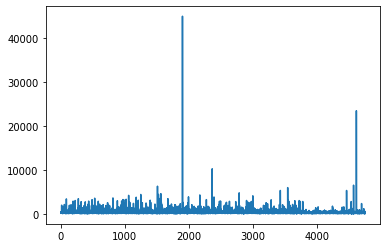

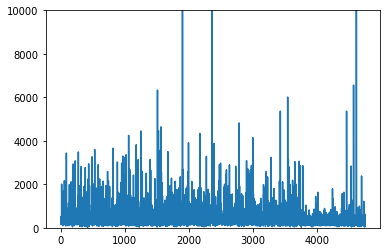

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

stat = []
for ss in train_new:
  stat.append(len(train_new[ss]))
 
for ss in test_new:
  stat.append(len(test_new[ss]))
 
for ss in eval_new:
  stat.append(len(eval_new[ss]))
 
stat = np.array(stat)



plt.plot(stat)
plt.show()

plt.plot(stat)
x1,x2,y1,y2 = plt.axis()

plt.axis((x1,x2,0,10000))
plt.show()




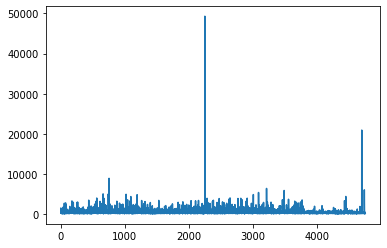

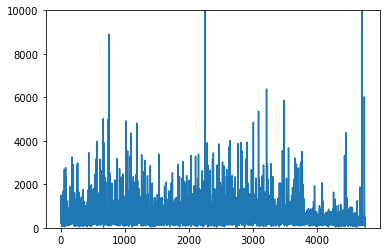

In [ ]:
stat1 = []
for ss in train_new:
  stat1.append(len(train_att[ss]))
 
for ss in test_new:
  stat1.append(len(test_att[ss]))
 
for ss in eval_new:
  stat1.append(len(eval_att[ss]))
 
stat1 = np.array(stat1)
plt.plot(stat1)
plt.show()

plt.plot(stat1)
x1,x2,y1,y2 = plt.axis()

plt.axis((x1,x2,0,10000))
plt.show()

In [ ]:
!pip install python-crfsuite
!pip install tensorflow-addons
!pip install tf2crf

     |████████████████████████████████| 706kB 5.6MB/s 


In [ ]:
%tensorflow_version 2.x

In [ ]:
train_array1= []
test_array1= []
eval_array1= []

train_array2= []
test_array2= []
eval_array2= []

train_genre= []
test_genre= []
eval_genre= []

train_genre_onehot= []
test_genre_onehot= []
eval_genre_onehot= []

#genre_list

def num_2_onehot(value,number_list):
  one_hot = [0. for e in range(len(number_list))]
  one_hot[value]=1.
  return np.array(one_hot)

for tr_data in train_new:
  train_array1.append(train_new[tr_data])
  train_array2.append(train_att[tr_data])
  train_genre.append(genre_map[tr_data])
  train_genre_onehot.append(num_2_onehot(genre_map[tr_data],genre_list))
for tr_data in test_new:
  test_array1.append(test_new[tr_data])
  test_array2.append(test_att[tr_data])
  test_genre.append(genre_map[tr_data])
  test_genre_onehot.append(num_2_onehot(genre_map[tr_data],genre_list))
for tr_data in eval_new:
  eval_array1.append(eval_new[tr_data])
  eval_array2.append(eval_att[tr_data])
  eval_genre.append(genre_map[tr_data])
  eval_genre_onehot.append(num_2_onehot(genre_map[tr_data],genre_list))

print(train_array1[0],train_array2[0],train_genre[0],train_genre_onehot[0])  

[6455, 40081, 40072, 19908, 59955, 45435, 44997, 62144, 3481, 62144, 36241, 6455, 40081, 40072, 19908, 47963, 58644, 59955, 47963, 44338, 19697, 34392, 46946, 55968, 17053, 62144, 62144, 10483, 62144, 36241, 33301, 60404, 61208, 6455, 40081, 17352, 55607, 21047, 14481, 8494, 9901, 46571, 25204, 30011, 33301, 58644, 51376, 10725, 46192, 12895, 47963, 46946, 44962, 14002, 59878, 15736, 51376, 10400, 3521, 34726, 32160, 38598, 44583, 42378, 21966, 60517, 60722, 9008, 51376, 40573, 10166, 27749, 55102, 14481, 55968, 17053, 22578, 51376, 55102, 43234, 15736, 5619, 55474, 56536, 32264, 33301, 27749, 46669, 29872, 13031, 62144, 56508, 50198, 40110, 19697, 8434, 45135, 10400, 19697, 2528, 25955, 27749, 42378, 21966, 19697, 41659, 3521, 26090, 34392, 17409, 32160, 3813, 5393, 7560, 51275, 8303, 23167, 375, 32160, 15374, 33301, 9901, 33663, 62144, 55968, 17053, 19697, 32634, 41746, 32160, 3813, 6082, 40, 11397, 25955, 3813, 28934, 17409, 38953, 19346, 23022, 37109, 34223, 32792, 62019, 9901, 551

In [ ]:
print(train_array1[0])
print(train_array2[0])
print(train_genre[0])
print(train_genre_onehot[0])  

[6455, 40081, 40072, 19908, 59955, 45435, 44997, 62144, 3481, 62144, 36241, 6455, 40081, 40072, 19908, 47963, 58644, 59955, 47963, 44338, 19697, 34392, 46946, 55968, 17053, 62144, 62144, 10483, 62144, 36241, 33301, 60404, 61208, 6455, 40081, 17352, 55607, 21047, 14481, 8494, 9901, 46571, 25204, 30011, 33301, 58644, 51376, 10725, 46192, 12895, 47963, 46946, 44962, 14002, 59878, 15736, 51376, 10400, 3521, 34726, 32160, 38598, 44583, 42378, 21966, 60517, 60722, 9008, 51376, 40573, 10166, 27749, 55102, 14481, 55968, 17053, 22578, 51376, 55102, 43234, 15736, 5619, 55474, 56536, 32264, 33301, 27749, 46669, 29872, 13031, 62144, 56508, 50198, 40110, 19697, 8434, 45135, 10400, 19697, 2528, 25955, 27749, 42378, 21966, 19697, 41659, 3521, 26090, 34392, 17409, 32160, 3813, 5393, 7560, 51275, 8303, 23167, 375, 32160, 15374, 33301, 9901, 33663, 62144, 55968, 17053, 19697, 32634, 41746, 32160, 3813, 6082, 40, 11397, 25955, 3813, 28934, 17409, 38953, 19346, 23022, 37109, 34223, 32792, 62019, 9901, 551

In [ ]:
def sentence_2_token(word_list):
  ans = [0. for e in range(len(word_2_num_map))]
  for word in word_list:
    ans[int(word)]+=1
  return ans

In [ ]:
train_array3= []
eval_array3= []


for sentence in train_array1:
  train_array3.append(sentence_2_token(sentence))
train_array3=np.array(train_array3)

#for sentence in test_array1:
#  eval_array3.append(sentence_2_token(sentence))
for sentence in eval_array1:
  eval_array3.append(sentence_2_token(sentence))
eval_array3=np.array(eval_array3)

train_array4= []
eval_array4= []

for sentence in train_array2:
  train_array4.append(sentence_2_token(sentence))
train_array4=np.array(train_array4)

#for sentence in test_array2:
#  eval_array4.append(sentence_2_token(sentence))
for sentence in eval_array2:
  eval_array4.append(sentence_2_token(sentence))
eval_array4=np.array(eval_array4)

# TRADITIONAL-MODEL

# NAIVE-BAYES

In [ ]:
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report



MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
model_naive_bayes1 = MultinomialNB()
model_naive_bayes1.fit(train_array3, np.array(train_genre))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred1 = model_naive_bayes1.predict(eval_array3)

In [ ]:
join_train_eval1 = eval_genre

In [ ]:
print(classification_report(y_pred1,np.array(join_train_eval1),digits=4))

              precision    recall  f1-score   support

           0     0.9456    0.8035    0.8688       173
           1     0.7857    0.7639    0.7746        72
           2     0.0000    0.0000    0.0000         0
           3     0.9167    0.7143    0.8029        77
           4     0.0000    0.0000    0.0000         0
           5     0.4815    0.8667    0.6190        15
           6     0.8214    0.7931    0.8070        29
           7     0.0000    0.0000    0.0000         0
           8     0.0000    0.0000    0.0000         0
           9     0.6000    1.0000    0.7500         6
          10     0.2000    0.5000    0.2857         2
          11     0.9057    0.9600    0.9320        50
          12     0.0000    0.0000    0.0000         0
          13     0.9535    0.9535    0.9535        43
          14     0.8333    0.7143    0.7692         7

    accuracy                         0.8143       474
   macro avg     0.4962    0.5379    0.5042       474
weighted avg     0.8816   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_naive_bayes2 = MultinomialNB()
model_naive_bayes2.fit(train_array4, np.array(train_genre))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred2 = model_naive_bayes1.predict(eval_array4)

In [ ]:
print(classification_report(y_pred2,np.array(join_train_eval1),digits=4))

              precision    recall  f1-score   support

           0     0.9660    0.7172    0.8232       198
           1     0.8143    0.6706    0.7355        85
           2     0.0000    0.0000    0.0000         0
           3     0.9000    0.6750    0.7714        80
           4     0.0000    0.0000    0.0000         0
           5     0.1111    1.0000    0.2000         3
           6     0.2857    0.8889    0.4324         9
           7     0.0000    0.0000    0.0000         0
           8     0.0000    0.0000    0.0000         0
           9     0.3000    1.0000    0.4615         3
          10     0.0000    0.0000    0.0000         1
          11     0.8679    0.9388    0.9020        49
          12     0.0000    0.0000    0.0000         0
          13     0.9070    0.9286    0.9176        42
          14     0.6667    1.0000    0.8000         4

    accuracy                         0.7511       474
   macro avg     0.3879    0.5213    0.4029       474
weighted avg     0.8852   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SUPPORT VECTOR MACHINE (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()


train3_tfidf = tfidf_transformer.fit_transform(train_array3)
model_svc1= SVC(kernel='linear').fit(train3_tfidf, np.array(train_genre))

In [ ]:
eval3_tfidf = tfidf_transformer.fit_transform(eval_array3)
y_pred3 = model_svc1.predict(eval3_tfidf)

print(classification_report(y_pred3,np.array(join_train_eval1),digits=4))

              precision    recall  f1-score   support

           0     0.9796    0.8324    0.9000       173
           1     0.7571    0.8548    0.8030        62
           2     0.0000    0.0000    0.0000         1
           3     0.9000    0.7826    0.8372        69
           4     0.0000    0.0000    0.0000         0
           5     0.7037    0.9048    0.7917        21
           6     0.9286    0.7879    0.8525        33
           7     0.0000    0.0000    0.0000         0
           8     0.2500    0.5000    0.3333         2
           9     0.9000    0.9000    0.9000        10
          10     0.2000    1.0000    0.3333         1
          11     0.9811    0.9123    0.9455        57
          12     0.0000    0.0000    0.0000         1
          13     0.9302    0.9756    0.9524        41
          14     0.5000    1.0000    0.6667         3

    accuracy                         0.8481       474
   macro avg     0.5354    0.6300    0.5544       474
weighted avg     0.9055   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
train4_tfidf = tfidf_transformer.fit_transform(train_array4)
model_svc2= SVC(kernel='linear').fit(train4_tfidf, np.array(train_genre))

In [ ]:
eval_tfidf4 = tfidf_transformer.fit_transform(eval_array4)
y_pred4 = model_svc2.predict(eval_tfidf4)

print(classification_report(y_pred4,np.array(join_train_eval1),digits=4))

              precision    recall  f1-score   support

           0     0.9728    0.8667    0.9167       165
           1     0.8143    0.8507    0.8321        67
           2     0.0000    0.0000    0.0000         0
           3     0.9333    0.7671    0.8421        73
           4     0.0000    0.0000    0.0000         0
           5     0.5926    0.7619    0.6667        21
           6     0.9286    0.8125    0.8667        32
           7     0.2500    1.0000    0.4000         1
           8     0.2500    0.5000    0.3333         2
           9     0.9000    0.6923    0.7826        13
          10     0.2000    0.3333    0.2500         3
          11     0.9245    0.9423    0.9333        52
          12     0.0000    0.0000    0.0000         0
          13     0.9302    0.9756    0.9524        41
          14     0.6667    1.0000    0.8000         4

    accuracy                         0.8502       474
   macro avg     0.5575    0.6335    0.5717       474
weighted avg     0.9015   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
model_LR1= LogisticRegression(random_state=0)
model_LR1.fit(train3_tfidf, np.array(train_genre))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred5 = model_LR1.predict(eval3_tfidf)

In [ ]:
print(classification_report(y_pred5,np.array(join_train_eval1),digits=4))

              precision    recall  f1-score   support

           0     0.9796    0.7826    0.8701       184
           1     0.7857    0.7857    0.7857        70
           2     0.0000    0.0000    0.0000         0
           3     0.9000    0.7297    0.8060        74
           4     0.0000    0.0000    0.0000         0
           5     0.4444    0.9231    0.6000        13
           6     0.7500    0.8077    0.7778        26
           7     0.0000    0.0000    0.0000         0
           8     0.0000    0.0000    0.0000         0
           9     0.7000    0.8750    0.7778         8
          10     0.0000    0.0000    0.0000         0
          11     0.9434    0.9434    0.9434        53
          12     0.0000    0.0000    0.0000         0
          13     0.9535    0.9535    0.9535        43
          14     0.5000    1.0000    0.6667         3

    accuracy                         0.8165       474
   macro avg     0.4638    0.5200    0.4787       474
weighted avg     0.8971   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_LR2= LogisticRegression(random_state=0)
model_LR2.fit(train4_tfidf, np.array(train_genre))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred6 = model_LR2.predict(eval_tfidf4)

In [ ]:
print(classification_report(y_pred6,np.array(join_train_eval1),digits=4))

              precision    recall  f1-score   support

           0     0.9728    0.7989    0.8773       179
           1     0.8143    0.7917    0.8028        72
           2     0.0000    0.0000    0.0000         0
           3     0.9167    0.7746    0.8397        71
           4     0.0000    0.0000    0.0000         0
           5     0.5185    0.7000    0.5957        20
           6     0.7500    0.8750    0.8077        24
           7     0.0000    0.0000    0.0000         0
           8     0.2500    1.0000    0.4000         1
           9     0.8000    0.8000    0.8000        10
          10     0.0000    0.0000    0.0000         0
          11     0.9245    0.9245    0.9245        53
          12     0.0000    0.0000    0.0000         0
          13     0.9070    0.9750    0.9398        40
          14     0.6667    1.0000    0.8000         4

    accuracy                         0.8249       474
   macro avg     0.5014    0.5760    0.5192       474
weighted avg     0.8912   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
train_array5 = []
train_array6 = []

test_array5 = []
test_array6 = []

eval_array5 = []
eval_array6 = []

train_array5=tf.keras.preprocessing.sequence.pad_sequences(train_array1, maxlen=3200, dtype='int32', padding='post', truncating='pre', value=0.)
train_array6=tf.keras.preprocessing.sequence.pad_sequences(train_array2, maxlen=3200, dtype='int32', padding='post', truncating='pre', value=0.)
test_array5=tf.keras.preprocessing.sequence.pad_sequences(test_array1, maxlen=3200, dtype='int32', padding='post', truncating='pre', value=0.)
test_array6=tf.keras.preprocessing.sequence.pad_sequences(test_array2, maxlen=3200, dtype='int32', padding='post', truncating='pre', value=0.)
eval_array5=tf.keras.preprocessing.sequence.pad_sequences(eval_array1, maxlen=3200, dtype='int32', padding='post', truncating='pre', value=0.)
eval_array6=tf.keras.preprocessing.sequence.pad_sequences(eval_array2, maxlen=3200, dtype='int32', padding='post', truncating='pre', value=0.)
print(train_array5[0],train_array5.shape)
print(train_array6[0],train_array6.shape)

[ 6455 40081 40072 ...     0     0     0] (3794, 3200)
[62144 40072 19908 ...     0     0     0] (3794, 3200)




```
# This is formatted as code
```

# CREATE NEURAL-BASED MODEL

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense ,Embedding, Bidirectional, Dropout, GlobalMaxPooling1D, GRU,LSTM,Conv1D,TimeDistributed,Flatten
from tensorflow.keras.optimizers import Adam

def RNN_model():
  inputs = Input(shape=(3200,), dtype='int32')

  x = (Embedding(len(word_2_num_map),64,input_length=3200,mask_zero=True))(inputs)
  x = Bidirectional(GRU(64, return_sequences=True))(x)
  #x = Bidirectional(LSTM(64, return_sequences=True))(x)
  x = GlobalMaxPooling1D()(x)
  x = Dense(64, activation="relu")(x)
  x = Dropout(0.5)(x)
  out = Dense(len(genre_list), activation='softmax')(x)

  model_RNN = Model(inputs=inputs, outputs=out)
  model_RNN.compile(optimizer=Adam(lr=0.001),  loss='categorical_crossentropy', metrics=['categorical_accuracy'])

  model_RNN.summary()
  return model_RNN

def CNN_model():
  inputs = Input(shape=(3200,), dtype='int32')

  x = (Embedding(len(word_2_num_map),128,input_length=3200,mask_zero=True))(inputs)
  x = Conv1D(128,5,1,padding='same',activation='relu')(x)
  x = GlobalMaxPooling1D()(x)
  x = Dense(128, activation="relu")(x)
  x = Dropout(0.5)(x)
  out = Dense(len(genre_list), activation='softmax')(x)
  model_CNN = Model(inputs=inputs, outputs=out)
  model_CNN.compile(optimizer=Adam(lr=0.001),  loss='categorical_crossentropy', metrics=['categorical_accuracy'])

  model_CNN.summary()
  return model_CNN


# CNN NEWMM

In [ ]:
model_CNN1= CNN_model()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3200)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 3200, 128)         7954560   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3200, 128)         82048     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 15)                1935

In [ ]:
model_CNN1.fit(np.array(train_array5),np.array(train_genre_onehot), batch_size=64,epochs=10,verbose=1,validation_data=(np.array(test_array5), np.array(test_genre_onehot)))

Epoch 1/10
60/60 [==============================] - 141s 2s/step - loss: 2.3785 - categorical_accuracy: 0.2721 - val_loss: 1.9401 - val_categorical_accuracy: 0.3188
Epoch 2/10
60/60 [==============================] - 142s 2s/step - loss: 1.7800 - categorical_accuracy: 0.4567 - val_loss: 1.4154 - val_categorical_accuracy: 0.6170
Epoch 3/10
60/60 [==============================] - 139s 2s/step - loss: 1.1888 - categorical_accuracy: 0.6933 - val_loss: 1.0947 - val_categorical_accuracy: 0.6853
Epoch 4/10
60/60 [==============================] - 139s 2s/step - loss: 0.8262 - categorical_accuracy: 0.7789 - val_loss: 0.9579 - val_categorical_accuracy: 0.7329
Epoch 5/10
60/60 [==============================] - 140s 2s/step - loss: 0.5633 - categorical_accuracy: 0.8519 - val_loss: 0.9715 - val_categorical_accuracy: 0.7516
Epoch 6/10
60/60 [==============================] - 140s 2s/step - loss: 0.4055 - categorical_accuracy: 0.8947 - val_loss: 0.9363 - val_categorical_accuracy: 0.7640
Epoch 7/10

In [ ]:


print(len(num_2_genre_map))
def evaluate(x_test,y_test,model):
  y_pred = model.predict(x_test)
  target = []
  for i in range (len(num_2_genre_map)-1):
     target.append("class"+str(i))
  print(y_pred[0])
  print(y_test[0])
  y_p = [np.argmax(e) for e in y_pred]
  y_t = [np.argmax(e) for e in y_test]

  y_p = np.array(y_p)
  y_t = np.array(y_t)
  print(y_p.shape,y_t.shape)
  return classification_report(y_p,y_t,digits=4)

15


In [ ]:
print(evaluate( np.array(eval_array5),np.array(eval_genre_onehot),model_CNN1))

[5.3090012e-01 7.4035078e-02 2.6609442e-01 9.2170289e-04 2.2008197e-02
 2.0457669e-04 2.2935977e-02 8.4277308e-03 3.6569205e-04 1.7096177e-03
 6.7700380e-03 4.3560416e-02 1.9441519e-02 3.5854164e-04 2.2664247e-03]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(474,) (474,)
              precision    recall  f1-score   support

           0     0.9728    0.8720    0.9196       164
           1     0.7714    0.8438    0.8060        64
           2     0.0000    0.0000    0.0000         3
           3     0.8833    0.7571    0.8154        70
           4     0.0000    0.0000    0.0000         0
           5     0.5926    0.8000    0.6809        20
           6     0.7857    0.7857    0.7857        28
           7     0.0000    0.0000    0.0000         0
           8     0.0000    0.0000    0.0000         0
           9     0.8000    0.5000    0.6154        16
          10     0.0000    0.0000    0.0000         0
          11     0.9434    0.8333    0.8850        60
          12     0.200

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# CNN ATTTACUT

In [ ]:
model_CNN2= CNN_model()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 3200)]            0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 3200, 128)         7954560   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 3200, 128)         82048     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 15)                1935

In [ ]:
model_CNN2.fit(np.array(train_array6),np.array(train_genre_onehot), batch_size=64,epochs=10,verbose=1,validation_data=(np.array(test_array6), np.array(test_genre_onehot)))

Epoch 1/10
60/60 [==============================] - 142s 2s/step - loss: 2.4252 - categorical_accuracy: 0.2764 - val_loss: 1.9442 - val_categorical_accuracy: 0.3727
Epoch 2/10
60/60 [==============================] - 140s 2s/step - loss: 1.8517 - categorical_accuracy: 0.4311 - val_loss: 1.4425 - val_categorical_accuracy: 0.6108
Epoch 3/10
60/60 [==============================] - 141s 2s/step - loss: 1.2968 - categorical_accuracy: 0.6476 - val_loss: 1.0602 - val_categorical_accuracy: 0.6915
Epoch 4/10
60/60 [==============================] - 140s 2s/step - loss: 0.9558 - categorical_accuracy: 0.7335 - val_loss: 0.9588 - val_categorical_accuracy: 0.7122
Epoch 5/10
60/60 [==============================] - 140s 2s/step - loss: 0.7494 - categorical_accuracy: 0.7989 - val_loss: 0.8992 - val_categorical_accuracy: 0.7391
Epoch 6/10
60/60 [==============================] - 140s 2s/step - loss: 0.6155 - categorical_accuracy: 0.8402 - val_loss: 0.8604 - val_categorical_accuracy: 0.7288
Epoch 7/10

In [ ]:
print(evaluate( np.array(eval_array6),np.array(eval_genre_onehot),model_CNN2))

[9.1523463e-03 7.9980783e-02 1.2686414e-02 1.5460626e-03 2.4138788e-02
 4.2879771e-02 1.6453294e-01 3.0525196e-03 4.7370119e-04 3.2819819e-03
 1.0681708e-03 2.1113914e-02 3.6943099e-03 6.3108927e-01 1.3090502e-03]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(474,) (474,)
              precision    recall  f1-score   support

           0     0.9864    0.8480    0.9119       171
           1     0.7857    0.8209    0.8029        67
           2     0.0000    0.0000    0.0000         1
           3     0.8833    0.7681    0.8217        69
           4     0.0000    0.0000    0.0000         0
           5     0.4815    0.5417    0.5098        24
           6     0.8214    0.8214    0.8214        28
           7     0.0000    0.0000    0.0000         0
           8     0.2500    0.3333    0.2857         3
           9     0.7000    0.8750    0.7778         8
          10     0.2000    1.0000    0.3333         1
          11     0.9057    0.8727    0.8889        55
          12     0.000

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# RNN NEWMM

In [ ]:
model_RNN1= RNN_model()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 3200)]            0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 3200, 64)          3977280   
_________________________________________________________________
bidirectional (Bidirectional (None, 3200, 128)         49920     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 15)                975 

In [ ]:
model_RNN1.fit(np.array(train_array5),np.array(train_genre_onehot), batch_size=64,epochs=5,verbose=1,validation_data=(np.array(test_array5), np.array(test_genre_onehot)))

Epoch 1/5
60/60 [==============================] - 394s 6s/step - loss: 2.4695 - categorical_accuracy: 0.2436 - val_loss: 2.0536 - val_categorical_accuracy: 0.3064
Epoch 2/5
60/60 [==============================] - 410s 7s/step - loss: 2.0044 - categorical_accuracy: 0.3479 - val_loss: 1.5080 - val_categorical_accuracy: 0.6460
Epoch 3/5
60/60 [==============================] - 402s 7s/step - loss: 1.3084 - categorical_accuracy: 0.6422 - val_loss: 1.1194 - val_categorical_accuracy: 0.7122
Epoch 4/5
60/60 [==============================] - 404s 7s/step - loss: 0.9185 - categorical_accuracy: 0.7548 - val_loss: 1.1097 - val_categorical_accuracy: 0.7598
Epoch 5/5
60/60 [==============================] - 401s 7s/step - loss: 0.6582 - categorical_accuracy: 0.8222 - val_loss: 0.9729 - val_categorical_accuracy: 0.7619


In [ ]:
print(evaluate( np.array(eval_array5),np.array(eval_genre_onehot),model_RNN1))

[1.2621478e-03 3.6600308e-05 1.6487907e-03 9.6275890e-01 5.2350404e-04
 1.7126808e-02 4.3981042e-04 1.6909573e-03 1.2104174e-03 4.1051235e-04
 2.1270763e-03 2.5956958e-04 8.6762784e-03 2.8037686e-05 1.8006080e-03]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(474,) (474,)
              precision    recall  f1-score   support

           0     0.9388    0.8679    0.9020       159
           1     0.7571    0.7794    0.7681        68
           2     0.0000    0.0000    0.0000         4
           3     0.9000    0.7826    0.8372        69
           4     0.0000    0.0000    0.0000         0
           5     0.6667    0.5455    0.6000        33
           6     0.7857    0.6875    0.7333        32
           7     0.0000    0.0000    0.0000         0
           8     0.0000    0.0000    0.0000         0
           9     0.4000    1.0000    0.5714         4
          10     0.0000    0.0000    0.0000         0
          11     0.9245    0.9074    0.9159        54
          12     0.200

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# RNN ATTACUT

In [ ]:
model_RNN2= RNN_model()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 3200)]            0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 3200, 64)          3977280   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 3200, 128)         49920     
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 15)                975 

In [ ]:
model_RNN2.fit(np.array(train_array6),np.array(train_genre_onehot), batch_size=64,epochs=5,verbose=1,validation_data=(np.array(test_array6), np.array(test_genre_onehot)))

Epoch 1/5
60/60 [==============================] - 389s 6s/step - loss: 2.5464 - categorical_accuracy: 0.2110 - val_loss: 2.0688 - val_categorical_accuracy: 0.3064
Epoch 2/5
60/60 [==============================] - 407s 7s/step - loss: 2.0342 - categorical_accuracy: 0.3542 - val_loss: 1.6445 - val_categorical_accuracy: 0.6046
Epoch 3/5
60/60 [==============================] - 408s 7s/step - loss: 1.5335 - categorical_accuracy: 0.5885 - val_loss: 1.1662 - val_categorical_accuracy: 0.6625
Epoch 4/5
60/60 [==============================] - 411s 7s/step - loss: 1.0650 - categorical_accuracy: 0.7136 - val_loss: 1.0821 - val_categorical_accuracy: 0.7081
Epoch 5/5
60/60 [==============================] - 402s 7s/step - loss: 0.8780 - categorical_accuracy: 0.7661 - val_loss: 0.9228 - val_categorical_accuracy: 0.7453


In [ ]:
print(evaluate( np.array(eval_array6),np.array(eval_genre_onehot),model_RNN2))

[5.6955244e-02 3.7895513e-04 1.7645889e-03 9.1461331e-01 5.2006915e-04
 8.2796318e-03 5.6584822e-03 2.0066532e-03 4.3040398e-04 1.2569741e-03
 2.2536604e-04 3.3294760e-05 7.3825116e-03 1.2231141e-04 3.7217929e-04]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(474,) (474,)
              precision    recall  f1-score   support

           0     0.9796    0.8324    0.9000       173
           1     0.8429    0.8194    0.8310        72
           2     0.0000    0.0000    0.0000         1
           3     0.8500    0.6892    0.7612        74
           4     0.0000    0.0000    0.0000         0
           5     0.4444    0.5217    0.4800        23
           6     0.7143    0.8696    0.7843        23
           7     0.0000    0.0000    0.0000         0
           8     0.0000    0.0000    0.0000         0
           9     0.6000    0.6667    0.6316         9
          10     0.0000    0.0000    0.0000         0
          11     0.9434    0.9091    0.9259        55
          12     0.000

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_RNN3= RNN_model()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 3200)]            0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 3200, 64)          3977280   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 3200, 128)         66048     
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 15)                975 

In [ ]:
model_RNN3.fit(np.array(train_array5),np.array(train_genre_onehot), batch_size=64,epochs=5,verbose=1,validation_data=(np.array(test_array5), np.array(test_genre_onehot)))

Epoch 1/5
60/60 [==============================] - 433s 7s/step - loss: 2.5262 - categorical_accuracy: 0.2483 - val_loss: 1.9208 - val_categorical_accuracy: 0.3064
Epoch 2/5
60/60 [==============================] - 426s 7s/step - loss: 1.9070 - categorical_accuracy: 0.3767 - val_loss: 1.6558 - val_categorical_accuracy: 0.4493
Epoch 3/5
60/60 [==============================] - 413s 7s/step - loss: 1.5591 - categorical_accuracy: 0.5318 - val_loss: 1.3054 - val_categorical_accuracy: 0.6377
Epoch 4/5
60/60 [==============================] - 415s 7s/step - loss: 1.1842 - categorical_accuracy: 0.6806 - val_loss: 1.0999 - val_categorical_accuracy: 0.6812
Epoch 5/5
60/60 [==============================] - 413s 7s/step - loss: 0.9560 - categorical_accuracy: 0.7306 - val_loss: 1.0478 - val_categorical_accuracy: 0.6957


In [ ]:
print(evaluate( np.array(eval_array5),np.array(eval_genre_onehot),model_RNN3))

[0.01124518 0.0201604  0.02065084 0.5385418  0.01722892 0.14230846
 0.11500871 0.01321617 0.00964525 0.03288427 0.01670091 0.00615438
 0.01496785 0.02306108 0.01822581]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(474,) (474,)
              precision    recall  f1-score   support

           0     0.9252    0.8889    0.9067       153
           1     0.7286    0.8500    0.7846        60
           2     0.0000    0.0000    0.0000         0
           3     0.9167    0.4331    0.5882       127
           4     0.0000    0.0000    0.0000         0
           5     0.1481    0.5000    0.2286         8
           6     0.0714    0.6667    0.1290         3
           7     0.0000    0.0000    0.0000         0
           8     0.0000    0.0000    0.0000         0
           9     0.0000    0.0000    0.0000         0
          10     0.0000    0.0000    0.0000         0
          11     0.9811    0.7536    0.8525        69
          12     0.0000    0.0000    0.0000         0
          13 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_RNN4= RNN_model()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 3200)]            0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 3200, 64)          3977280   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 3200, 128)         66048     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 15)                975 

In [ ]:
model_RNN4.fit(np.array(train_array6),np.array(train_genre_onehot), batch_size=64,epochs=5,verbose=1,validation_data=(np.array(test_array6), np.array(test_genre_onehot)))

Epoch 1/5
60/60 [==============================] - 423s 7s/step - loss: 2.5207 - categorical_accuracy: 0.2429 - val_loss: 2.0729 - val_categorical_accuracy: 0.3064
Epoch 2/5
60/60 [==============================] - 424s 7s/step - loss: 2.0130 - categorical_accuracy: 0.3432 - val_loss: 1.6601 - val_categorical_accuracy: 0.4928
Epoch 3/5
60/60 [==============================] - 420s 7s/step - loss: 1.6793 - categorical_accuracy: 0.4894 - val_loss: 1.4868 - val_categorical_accuracy: 0.5549
Epoch 4/5
60/60 [==============================] - 416s 7s/step - loss: 1.3919 - categorical_accuracy: 0.5963 - val_loss: 1.3306 - val_categorical_accuracy: 0.6294
Epoch 5/5
60/60 [==============================] - 416s 7s/step - loss: 1.1934 - categorical_accuracy: 0.6730 - val_loss: 1.2986 - val_categorical_accuracy: 0.6501


In [ ]:
print(evaluate( np.array(eval_array6),np.array(eval_genre_onehot),model_RNN4))

[0.50650364 0.06368102 0.02496928 0.12522109 0.02507689 0.03609887
 0.09994219 0.00749183 0.01107651 0.01580191 0.00977661 0.0111271
 0.01740186 0.01059666 0.03523451]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(474,) (474,)
              precision    recall  f1-score   support

           0     0.9932    0.7766    0.8716       188
           1     0.8286    0.6105    0.7030        95
           2     0.0000    0.0000    0.0000         0
           3     0.7000    0.5833    0.6364        72
           4     0.0000    0.0000    0.0000         0
           5     0.0370    0.5000    0.0690         2
           6     0.1071    0.3000    0.1579        10
           7     0.0000    0.0000    0.0000         0
           8     0.0000    0.0000    0.0000         0
           9     0.0000    0.0000    0.0000         0
          10     0.0000    0.0000    0.0000         0
          11     0.9245    0.8909    0.9074        55
          12     0.0000    0.0000    0.0000         0
          13  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_RNN1.fit(np.array(train_array5),np.array(train_genre_onehot), batch_size=64,epochs=5,verbose=1,validation_data=(np.array(test_array5), np.array(test_genre_onehot)))

Epoch 1/5
60/60 [==============================] - 403s 7s/step - loss: 0.5541 - categorical_accuracy: 0.8492 - val_loss: 1.1865 - val_categorical_accuracy: 0.7453
Epoch 2/5
60/60 [==============================] - 405s 7s/step - loss: 0.4315 - categorical_accuracy: 0.8809 - val_loss: 1.2043 - val_categorical_accuracy: 0.7391
Epoch 3/5
60/60 [==============================] - 408s 7s/step - loss: 0.3825 - categorical_accuracy: 0.8935 - val_loss: 1.0495 - val_categorical_accuracy: 0.7723
Epoch 4/5
60/60 [==============================] - 404s 7s/step - loss: 0.3155 - categorical_accuracy: 0.9096 - val_loss: 1.3403 - val_categorical_accuracy: 0.7412
Epoch 5/5
60/60 [==============================] - 400s 7s/step - loss: 0.2634 - categorical_accuracy: 0.9244 - val_loss: 1.3835 - val_categorical_accuracy: 0.7578


In [ ]:
print(evaluate( np.array(eval_array5),np.array(eval_genre_onehot),model_RNN1))

[9.6870738e-01 1.1406827e-02 2.7861449e-06 1.9350179e-02 7.9309584e-06
 1.8596367e-06 1.3033821e-05 2.1703963e-06 3.8505750e-06 9.2060582e-06
 2.3726100e-06 8.0413374e-06 4.7954763e-04 2.5442521e-08 4.7211715e-06]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(474,) (474,)
              precision    recall  f1-score   support

           0     0.9320    0.8616    0.8954       159
           1     0.8143    0.8143    0.8143        70
           2     0.0000    0.0000    0.0000         0
           3     0.8667    0.6667    0.7536        78
           4     0.0000    0.0000    0.0000         0
           5     0.4074    0.4400    0.4231        25
           6     0.8214    0.6571    0.7302        35
           7     0.0000    0.0000    0.0000         0
           8     0.0000    0.0000    0.0000         0
           9     0.3000    0.6000    0.4000         5
          10     0.2000    0.5000    0.2857         2
          11     0.9245    0.9423    0.9333        52
          12     0.000

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_RNN2.fit(np.array(train_array6),np.array(train_genre_onehot), batch_size=64,epochs=5,verbose=1,validation_data=(np.array(test_array6), np.array(test_genre_onehot)))

Epoch 1/5
60/60 [==============================] - 402s 7s/step - loss: 0.7140 - categorical_accuracy: 0.8023 - val_loss: 0.9739 - val_categorical_accuracy: 0.7267
Epoch 2/5
60/60 [==============================] - 401s 7s/step - loss: 0.6286 - categorical_accuracy: 0.8289 - val_loss: 0.9403 - val_categorical_accuracy: 0.7391
Epoch 3/5
60/60 [==============================] - 403s 7s/step - loss: 0.5449 - categorical_accuracy: 0.8503 - val_loss: 1.0038 - val_categorical_accuracy: 0.7453
Epoch 4/5
60/60 [==============================] - 403s 7s/step - loss: 0.4702 - categorical_accuracy: 0.8701 - val_loss: 1.0344 - val_categorical_accuracy: 0.7288
Epoch 5/5
60/60 [==============================] - 401s 7s/step - loss: 0.4000 - categorical_accuracy: 0.8890 - val_loss: 1.0745 - val_categorical_accuracy: 0.7350


In [ ]:
print(evaluate( np.array(eval_array6),np.array(eval_genre_onehot),model_RNN2))

[1.8732575e-03 4.6021871e-02 2.1622801e-02 3.8136099e-04 2.8085737e-02
 8.1945779e-03 4.1837986e-03 3.8858664e-03 6.5367238e-04 1.1268641e-02
 1.5557006e-03 2.3659723e-02 2.3653188e-03 8.4044337e-01 5.8042235e-03]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(474,) (474,)
              precision    recall  f1-score   support

           0     0.9456    0.8528    0.8968       163
           1     0.7714    0.8438    0.8060        64
           2     0.0000    0.0000    0.0000         0
           3     0.8500    0.6538    0.7391        78
           4     0.0000    0.0000    0.0000         0
           5     0.6667    0.6000    0.6316        30
           6     0.8214    0.7188    0.7667        32
           7     0.0000    0.0000    0.0000         0
           8     0.0000    0.0000    0.0000         0
           9     0.4000    0.8000    0.5333         5
          10     0.0000    0.0000    0.0000         1
          11     0.9057    0.8727    0.8889        55
          12     0.000

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
